TASK 1

Task 1.1: Develop a Cython version of the STREAM benchmark. Make sure to define the ctypes for obtaining full performance.

In [2]:
#We start by running the code from the previous task, and plot the bandwidth versus size of array used for the array data type
!python3 stream.py

Running test 1 out of 10
Running test 2 out of 10
Running test 3 out of 10
Running test 4 out of 10
Running test 5 out of 10
Running test 6 out of 10
Running test 7 out of 10
Running test 8 out of 10
Running test 9 out of 10
Running test 10 out of 10


In [ ]:
#We now run the cythonized version. The function run_STREAM_average was cythonized to be numpy arrays. You can see how in the files cythonfn.pyx and stream_cythonized.py
#The program plots the bandwidth results varying the arrays' size, as asked in tasl 1.2
!python3 setup.py build_ext --inplace
!oython3 stream_cythonized.py

As we can see by comparing the graphs, we can see that after cythnonizing, the bandwidth results for each operation show an increase in bandwidth by around two orders of magnitude.
For example, the average bandwidth of a copy operation without cythonization is around 1.85e^8 B/s, and for a copy operation with its around 1.2e^10
This is a huge increase, as expected.

In [9]:
import numpy as np
from timeit import default_timer as timer

def gauss_seidel(f):
    newf = f.copy()
    
    for i in range(1,newf.shape[0]-1):
        for j in range(1,newf.shape[1]-1):
            newf[i,j] = 0.25 * (newf[i,j+1] + newf[i,j-1] +
                                   newf[i+1,j] + newf[i-1,j])
    
    return newf

In [5]:
grid_sizes = [10 * i for i in range(25)]

start = timer()

n_experiments = 2

results = []

for s in grid_sizes:
    print("Grid size: ", s)
    times = np.zeros((n_experiments))
    for i in range(n_experiments):
        print("Experiment: ", i)
        f = np.zeros((s, s))
        f[1:-1, 1:-1] = 1
        
        start = timer()
        for j in range(1000):    
            f = gauss_seidel(f)
        end = timer()
        
        times[i] = end - start
    
    results.append(np.mean(times))
    print(results[-1])
    
    
np.save("results_impl1.npy", results)

results_python = np.load("results_impl1.npy")
print(results_python)

Grid size:  0
Experiment:  0
Experiment:  1
0.0017224410039489157
Grid size:  10
Experiment:  0
Experiment:  1
0.06077186249967781
Grid size:  20
Experiment:  0
Experiment:  1
0.27450313749795896
Grid size:  30
Experiment:  0
Experiment:  1
0.6386206005045096
Grid size:  40
Experiment:  0
Experiment:  1
0.9825312400025723
Grid size:  50
Experiment:  0
Experiment:  1
1.3387568830003147
Grid size:  60
Experiment:  0
Experiment:  1
1.9943724785007362
Grid size:  70
Experiment:  0
Experiment:  1
2.9890904175008473
Grid size:  80
Experiment:  0
Experiment:  1
4.006302367000899
Grid size:  90
Experiment:  0
Experiment:  1
5.0602392824985145
Grid size:  100
Experiment:  0
Experiment:  1
6.498378264997882
Grid size:  110
Experiment:  0
Experiment:  1
8.065639890999591
Grid size:  120
Experiment:  0
Experiment:  1
9.817276131001563
Grid size:  130
Experiment:  0
Experiment:  1
11.280071720997512
Grid size:  140
Experiment:  0
Experiment:  1
13.173874936499487
Grid size:  150
Experiment:  0
Expe

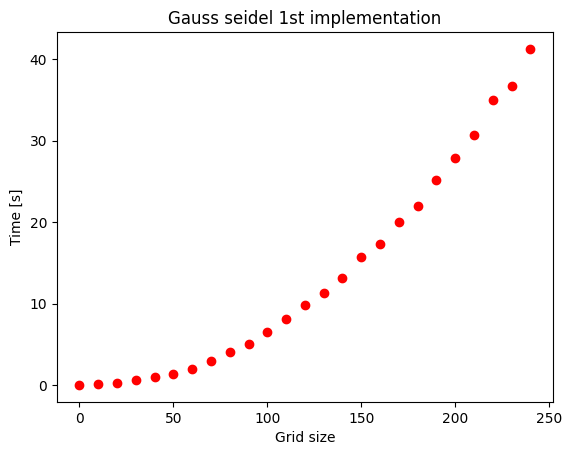

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def get_points_xy(grid_sizes, results):
    points = []

    for i in range(len(grid_sizes)):
        points.append([grid_sizes[i], results[i]])
    
        
    data = np.array([points])
    x, y = data.T
    
    return [x, y]

results_python = np.load("results_impl1.npy")
x, y = get_points_xy(grid_sizes, results_python)
plt.scatter(x, y, color="red", marker='o', label="test")
plt.title("Gauss seidel 1st implementation")
plt.xlabel('Grid size')
plt.ylabel('Time [s]')
plt.show()

# Part 2.2

# Result from cProfile
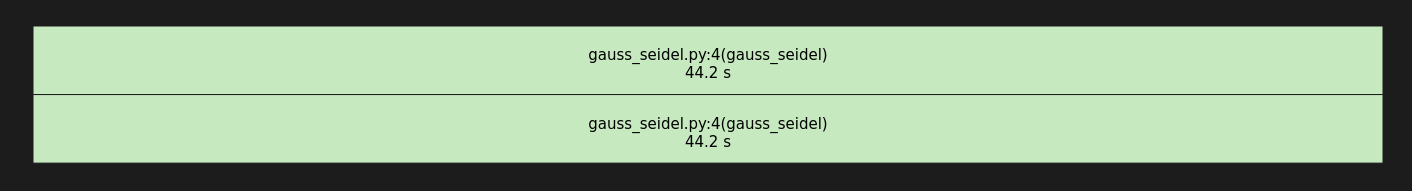
We can see that it is not very useful, it is just saying that the gauss_seidel function is taking most of the time

# Result from line_profiler
This is more helpful, we can see that line 10 is 88% of the computing time
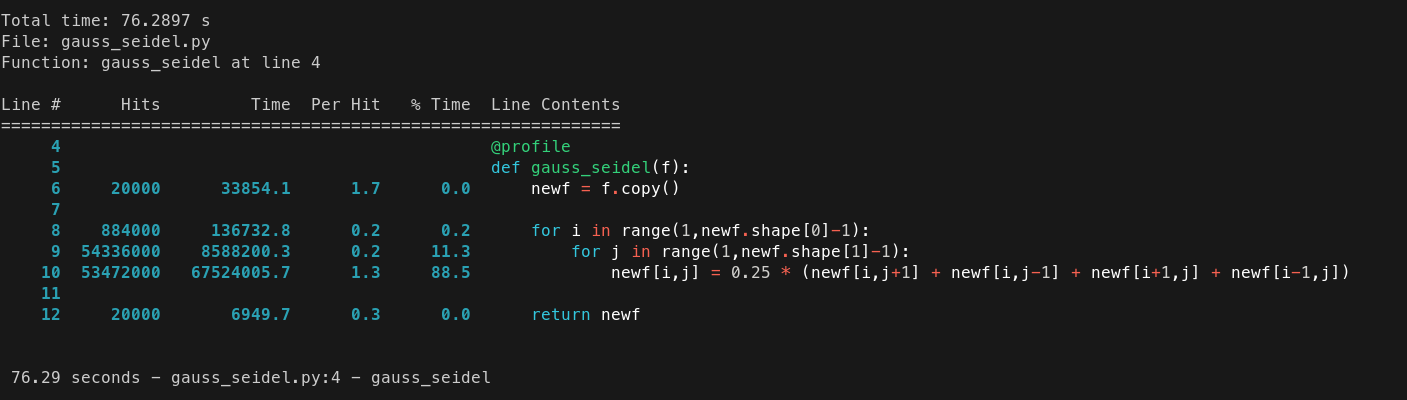

# Part 2.4 Results from Cython version

In [10]:
!cd gauss_seidel_cython && python3 setup.py build_ext --inplace && python3 cythonmain.py

Grid size:  0
Experiment:  0
Experiment:  1
0.0012401614985719789
Grid size:  10
Experiment:  0
Experiment:  1
0.03363516100216657
Grid size:  20
Experiment:  0
Experiment:  1
0.15188735549963894
Grid size:  30
Experiment:  0
Experiment:  1
0.35019913100040867
Grid size:  40
Experiment:  0
Experiment:  1
0.6525151130044833
Grid size:  50
Experiment:  0
Experiment:  1
0.9957708479996654
Grid size:  60
Experiment:  0
Experiment:  1
1.4751853415000369
Grid size:  70
Experiment:  0
Experiment:  1
2.0667328480012657
Grid size:  80
Experiment:  0
Experiment:  1
2.691601480997633
Grid size:  90
Experiment:  0
Experiment:  1
3.306765337001707
Grid size:  100
Experiment:  0
Experiment:  1
5.304830600500281
Grid size:  110
Experiment:  0
Experiment:  1
5.806669543002499
Grid size:  120
Experiment:  0
Experiment:  1
7.526344510002673
Grid size:  130
Experiment:  0
Experiment:  1
8.469740337499388
Grid size:  140
Experiment:  0
Experiment:  1
10.228871946499567
Grid size:  150
Experiment:  0
Exper

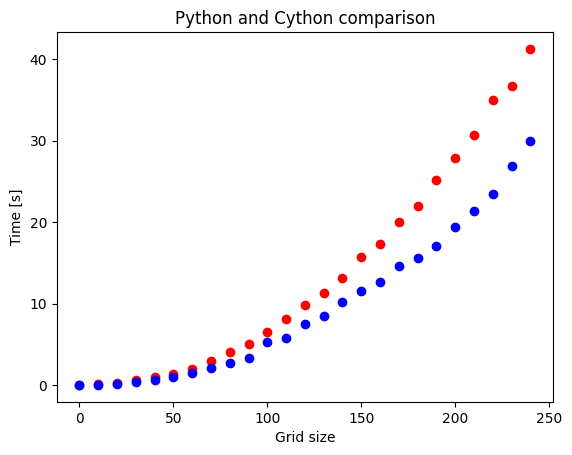

In [14]:
import numpy as np
results_python = np.load("results_impl1.npy")
results_cython = np.load("gauss_seidel_cython/out.npy")

grid_sizes = [10 * i for i in range(25)]

x, y = get_points_xy(grid_sizes, results)
plt.scatter(x, y, color="red", marker='o', label="python")

x_c, y_c = get_points_xy(grid_sizes, results_cython)
plt.scatter(x_c, y_c, color="blue", marker='o', label="cython")

plt.title("Python and Cython comparison")
plt.xlabel('Grid size')
plt.ylabel('Time [s]')
plt.show()

In [ ]:
# Task 2.5 - Pytorch
!pip3 install torch
!pip3 install numpy
!pip3 install pytest-timeit

The following code was ran in Google Collab, https://colab.research.google.com/drive/1bB9Onnnb1rxDCCQtUvbQMMekN3o_TCbF?usp=sharing
Time times taken in said computation have been added to this folder as `results_pytorch.npy`. 

In [ ]:
import torch
from torch import (roll, zeros)
import numpy as np
from timeit import default_timer as timer

def gauss_seidel(f, initf):
    f = f.cuda()
    initf = initf.cuda()
    return (0.25 * (roll(f, 1, 0) + roll(f, -1, 0) + roll(f, +1, 1) + roll(f, -1, 1))) * initf
      
grid_sizes = [100 * i for i in range(10)]
start = timer()

n_experiments = 10

results = []

for s in grid_sizes:
    print("Grid size: ", s)
    times = np.zeros((n_experiments))
    for i in range(n_experiments):
        print("Experiment: ", i)
        f = np.zeros((s, s))
        f[1:-1, 1:-1] = 1
        tf = torch.from_numpy(f)
        initf = torch.from_numpy(f)
        start = timer()
        for j in range(1000):    
            tf = gauss_seidel(tf, initf)
        end = timer()
        
        times[i] = end - start
    results.append(np.mean(times))
    print(results[-1])
    np.save("results_pytorch.npy", results)

This yields huge performance improvements compared to previous attempts. This can probably be attributed to three important changes
* Using a simpler method (Jacobi)
* Parallelization using roll
* Utilizing the GPU

In [ ]:
# 2.6 CuPy
!pip3 install cupy

The following code was ran in Google Collab, https://colab.research.google.com/drive/1bB9Onnnb1rxDCCQtUvbQMMekN3o_TCbF?usp=sharing
Time times taken in said computation have been added to this folder as `results_cupy.npy`. 

In [ ]:
import numpy as np
import cupy as cp
from cupy import (roll)
from timeit import default_timer as timer

def gauss_seidel(f, initf):
    newf = (0.25 * (roll(f, 1, 0) + roll(f, -1, 0) + roll(f, +1, 1) + roll(f, -1, 1))) * initf
    cp.cuda.Stream.null.synchronize()
    return newf
      
grid_sizes = [100 * i for i in range(10)]
start = timer()

n_experiments = 10

results = []

for s in grid_sizes:
    print("Grid size: ", s)
    times = np.zeros((n_experiments))
    for i in range(n_experiments):
        print("Experiment: ", i)
        cf = cp.zeros((s, s))
        cf[1:-1, 1:-1] = 1
        initf = cp.zeros((s, s))
        initf[1:-1, 1:-1] = 1
        start = timer()
        for j in range(1000):    
            cf = gauss_seidel(cf, initf)
        end = timer()
        
        times[i] = end - start
    results.append(np.mean(times))
    print(results[-1])
    np.save("results_cupy.npy", results)

As we can see, CuPy performs worse than PyTorch for smaller grid sizes. It appears that CuPy scales better and performs better compared to Pytorch in test cases with larger grid sizes.

In [ ]:
# 2.7

import matplotlib.pyplot as plt
import numpy as np

def get_points_xy(grid_sizes, results):
    points = []

    for i in range(len(grid_sizes)):
        points.append([grid_sizes[i], results[i]])
    
        
    data = np.array([points])
    x, y = data.T
    
    return [x, y]

results_pytorch = np.load("results_pytorch.npy")
results_cupy = np.load("results_cupy.npy")

grid_sizes = [100 * i for i in range(10)]

x_t, y_t = get_points_xy(grid_sizes, results_pytorch)
plt.scatter(x_t, y_t, color="red", marker='o', label="Pytorch")

x_c, y_c = get_points_xy(grid_sizes, results_cupy)
plt.scatter(x_c, y_c, color="blue", marker='o', label="CuPy")

plt.title("Pytorch and CuPy comparison")
plt.xlabel('Grid size')
plt.ylabel('Time [s]')
plt.show()

In [ ]:
# 2.8
!pip3 install h5py

In [ ]:
import h5py 
import numpy as np
import cupy as cp
from cupy import (roll)
from timeit import default_timer as timer

def gauss_seidel(f, initf):
    newf = (0.25 * (roll(f, 1, 0) + roll(f, -1, 0) + roll(f, +1, 1) + roll(f, -1, 1))) * initf
    cp.cuda.Stream.null.synchronize()
    return newf
      
grid_sizes = 600
cf = cp.zeros((s, s))
cf[1:-1, 1:-1] = 1
initf = cp.zeros((s, s))
initf[1:-1, 1:-1] = 1
start = timer()
for j in range(1000):    
    cf = gauss_seidel(cf, initf)

cf = cp.asnumpy(cf)

f = h5py.File("newgrid.hdf5", "a")
f["/cupy/newgrid"] = cf